#CONTEXTO E DEMANDA

### Você tem disponível dados de coversão e impressões de 3 anúncios recentemente lançados. Seu objetivo é recomendar qual anúncio deve ser exibido para cada segmento. Essa campanha será lançada na segunda-feira e ficará no ar até a quinta-feira subsequente. Os resultados serão avaliados no fim de semana subsequente (sexta-feira, sábado e domingo).



## Data description

**impressions.csv**

**ts:** timestamp da avaliação de exibição do anúncio

**ad:** ID do anúncio

**segment:** segmento que visualizou o anúncio

**impressions:** número de impressões

**conversions.csv**

**ad:** ID do anúncio

**segment:** segmento que visualizou o anúncio

**date:** data avaliação de conversão do anúncio

**conversions:** número de conversões

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
impressions = pd.read_csv('impressions.csv')
conversions = pd.read_csv('conversions.csv')

## IMPRESSIONS

In [3]:
impressions.head()

,ts,ad,segment,impressions
0,2024-02-01 21:13:42.034115,ad1,seg1,5
1,2024-02-10 22:09:27.880630,ad1,seg1,15
2,2024-02-16 05:47:00.769122,ad1,seg1,47
3,2024-02-24 11:12:46.364382,ad1,seg1,23
4,2024-02-24 01:44:10.080503,ad1,seg1,30


In [4]:
impressions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ts           1137 non-null   object
 1   ad           1137 non-null   object
 2   segment      1137 non-null   object
 3   impressions  1137 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 35.7+ KB


In [5]:
#criando campo de data a partir do timestamp
impressions['ts'] = pd.to_datetime(impressions['ts'])
impressions['date'] = impressions['ts'].dt.date

In [6]:
#criando campo de dia da semana
impressions['date'] = pd.to_datetime(impressions['date'])
impressions['day_of_week'] = impressions['date'].dt.day_name()

In [7]:
#nao precisamos mais da coluna timestamp
impressions = impressions.drop('ts', axis=1)

### Análise estatística

In [8]:
#ANÁLISE DE OUTLIERS DE IMPRESSIONS
Q1 = impressions['impressions'].quantile(0.25)
Q3 = impressions['impressions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR
outliers = impressions[(impressions['impressions'] < lower_bound) | (impressions['impressions'] > upper_bound)]
print(outliers)

       ad segment  impressions       date day_of_week
54    ad1    seg1           65 2024-02-24    Saturday
118   ad1    seg2           60 2024-02-05      Monday
201   ad1    seg2           64 2024-02-16      Friday
352   ad1    seg4           62 2024-02-02      Friday
414   ad2    seg1           64 2024-02-05      Monday
...   ...     ...          ...        ...         ...
1129  ad3    seg4          125 2024-02-20     Tuesday
1131  ad3    seg4          104 2024-02-14   Wednesday
1132  ad3    seg4          149 2024-02-22    Thursday
1134  ad3    seg4          107 2024-02-16      Friday
1135  ad3    seg4          105 2024-02-03    Saturday

[162 rows x 5 columns]


In [9]:
impressions_no_outliers = impressions[(impressions['impressions'] >= lower_bound) & (impressions['impressions'] <= upper_bound)]

In [10]:
impressions_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 1136
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ad           975 non-null    object        
 1   segment      975 non-null    object        
 2   impressions  975 non-null    int64         
 3   date         975 non-null    datetime64[ns]
 4   day_of_week  975 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 45.7+ KB


In [11]:
impressions.describe()


,impressions,date
count,1137.000000,1137
mean,35.778364,2024-02-14 08:22:47.810026496
min,1.000000,2024-01-31 00:00:00
25%,16.000000,2024-02-08 00:00:00
50%,29.000000,2024-02-14 00:00:00
75%,44.000000,2024-02-21 00:00:00
max,201.000000,2024-02-29 00:00:00
std,29.486422,NaN


In [12]:
impressions_no_outliers.describe()

,impressions,date
count,975.000000,975
mean,26.061538,2024-02-14 17:13:50.769230848
min,1.000000,2024-01-31 00:00:00
25%,14.000000,2024-02-09 00:00:00
50%,26.000000,2024-02-15 00:00:00
75%,37.000000,2024-02-21 00:00:00
max,58.000000,2024-02-29 00:00:00
std,14.418799,NaN


realizando o tratamento de outliers, 162 registros foram removidos. A média tornou a sua normalidade, de 35 impressões, agora ficou 26

### SEGMENT

In [13]:
#verificando a soma de impressions por segment
seg_grouped = impressions_no_outliers.groupby('segment')['impressions'].sum()
seg_sorted = seg_grouped.sort_values(ascending=False)
print(seg_sorted)

segment
seg2    8104
seg1    7439
seg3    5834
seg4    4033
Name: impressions, dtype: int64


💡 Seg2 e seg1 possuem o maior número de impressões no total

In [14]:
impressions_no_outliers['segment'].value_counts()

segment
seg2    324
seg1    275
seg3    210
seg4    166
Name: count, dtype: int64

In [15]:
seg_counts = pd.DataFrame(impressions_no_outliers['segment'].value_counts())

In [16]:
seg_sort = pd.DataFrame(seg_sorted)

In [17]:
analise_seg = pd.merge(seg_counts, seg_sort, on=['segment'])

In [18]:
analise_seg['proporcao'] = analise_seg['impressions'] / analise_seg['count']

In [19]:
analise_seg.head()

,count,impressions,proporcao
segment,,,
seg2,324,8104,25.012346
seg1,275,7439,27.050909
seg3,210,5834,27.780952
seg4,166,4033,24.295181


💡 Vimos aqui que a por mais que o seg2 seja maior em impressões totais, proporcionalmente pelo número de vezes em que se repete, os que possuem mais comentários são seg1 e seg3.

### AD

In [20]:
#realizando a mesma análise para ad
ad_grouped = impressions_no_outliers.groupby('ad')['impressions'].sum()
ad_sorted = ad_grouped.sort_values(ascending=False)
print(ad_sorted)

ad
ad2    12953
ad1     7851
ad3     4606
Name: impressions, dtype: int64


In [21]:
impressions_no_outliers['ad'].value_counts()

ad
ad2    430
ad1    379
ad3    166
Name: count, dtype: int64

In [22]:
ad_counts = pd.DataFrame(impressions_no_outliers['ad'].value_counts())
ad_sort = pd.DataFrame(ad_sorted)
analise_ad = pd.merge(ad_counts, ad_sort, on=['ad'])

In [23]:
analise_ad['proporcao'] = analise_ad['impressions'] / analise_ad['count']

In [24]:
analise_ad.head()

,count,impressions,proporcao
ad,,,
ad2,430,12953,30.123256
ad1,379,7851,20.715040
ad3,166,4606,27.746988


💡 O ad2 possui maior número de registros e também de impressões, e proporcionalmente é o que mais entrega resultado também.

### WEEKDAY

In [25]:
weekday_grouped = impressions_no_outliers.groupby('day_of_week')['impressions'].sum()
weekday_sorted = weekday_grouped.sort_values(ascending=False)
print(weekday_sorted)

day_of_week
Sunday       4173
Monday       4087
Saturday     4050
Wednesday    3769
Friday       3430
Tuesday      2954
Thursday     2947
Name: impressions, dtype: int64


In [26]:
weekday_counts = pd.DataFrame(impressions_no_outliers['day_of_week'].value_counts())
weekday_sort = pd.DataFrame(weekday_sorted)
analise_weekday = pd.merge(weekday_counts, weekday_sort, on=['day_of_week'])

In [27]:
analise_weekday['proporcao'] = analise_weekday['impressions'] / analise_weekday['count']
#analise_weekday['proporcao'].sort_values(ascending=False)
analise_weekday.head(15)

,count,impressions,proporcao
day_of_week,,,
Saturday,163,4050,24.846626
Monday,154,4087,26.538961
Sunday,153,4173,27.274510
Friday,138,3430,24.855072
Wednesday,132,3769,28.553030
Tuesday,120,2954,24.616667
Thursday,115,2947,25.626087


💡 Todos os dias possuem uma média equilibrada de registros, porém o que mais possui relevância em proporção de impressões é Quarta-feira (Wednesday), seguindo de domingo(Sunday).

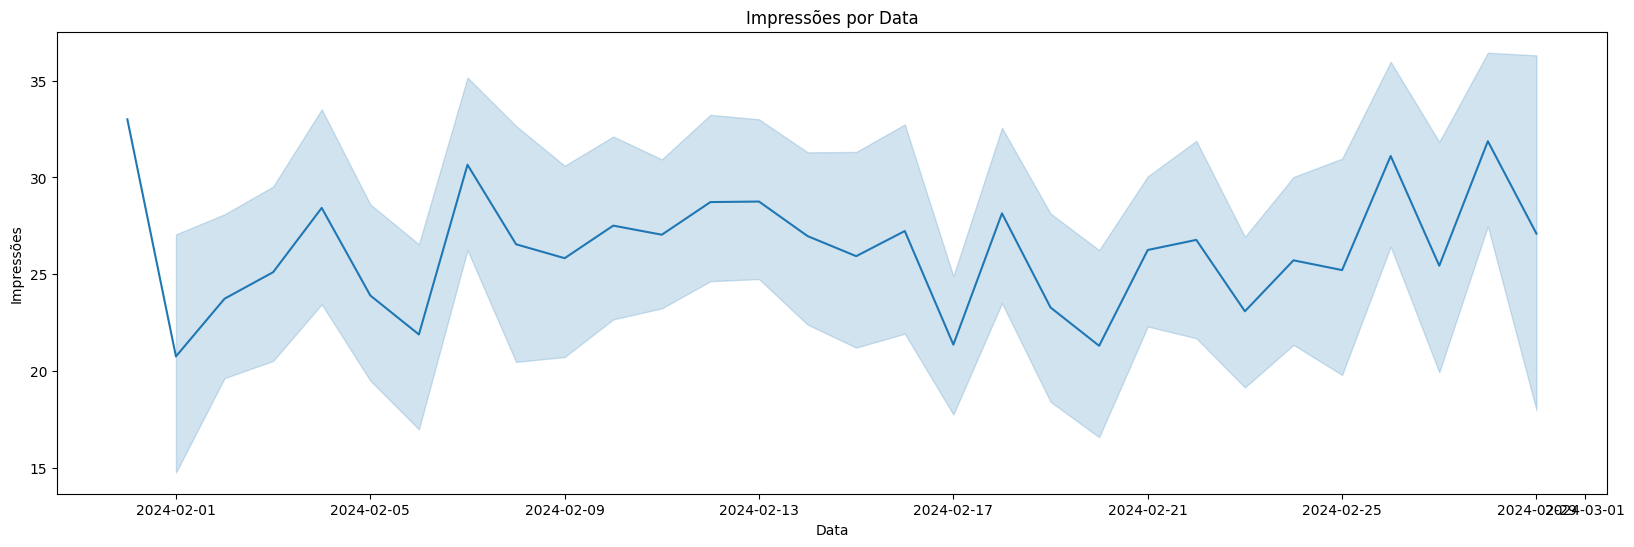

In [28]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='date', y='impressions', data=impressions_no_outliers)
plt.title('Impressões por Data')
plt.xlabel('Data')
plt.ylabel('Impressões')
plt.show()

## CONVERSIONS


In [29]:
conversions.head()

,ad,segment,date,conversions
0,ad1,seg1,2024-07-28,6
1,ad1,seg1,2024-07-29,9
2,ad1,seg1,2024-07-30,2
3,ad1,seg1,2024-07-31,3
4,ad1,seg1,2024-08-02,6


In [30]:
conversions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ad           279 non-null    object
 1   segment      279 non-null    object
 2   date         279 non-null    object
 3   conversions  279 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.8+ KB


In [31]:
conversions['date'] = pd.to_datetime(conversions['date'])
conversions['day_of_week'] = conversions['date'].dt.day_name()

### Análise estatística

In [32]:

#ANÁLISE DE OUTLIERS DE Conversions
Q1 = conversions['conversions'].quantile(0.25)
Q3 = conversions['conversions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR
outliers = conversions[(conversions['conversions'] < lower_bound) | (conversions['conversions'] > upper_bound)]
print(outliers)

      ad segment       date  conversions day_of_week
26   ad1    seg2 2024-08-22           38    Thursday
32   ad1    seg2 2024-08-29           24    Thursday
34   ad1    seg2 2024-08-31           30    Saturday
41   ad1    seg2 2024-09-07           35    Saturday
73   ad1    seg4 2024-06-29           22    Saturday
74   ad1    seg4 2024-06-30           32      Sunday
144  ad2    seg3 2024-06-11           23     Tuesday
153  ad2    seg3 2024-06-20           26    Thursday
184  ad3    seg1 2024-05-25           33    Saturday
185  ad3    seg1 2024-05-26           40      Sunday
189  ad3    seg1 2024-05-30           41    Thursday
192  ad3    seg1 2024-06-02           41      Sunday
193  ad3    seg1 2024-06-05           52   Wednesday
200  ad3    seg1 2024-06-12           28   Wednesday
201  ad3    seg1 2024-06-13           30    Thursday
202  ad3    seg1 2024-06-14           25      Friday
204  ad3    seg1 2024-06-16           22      Sunday
208  ad3    seg2 2024-07-09           23     T

In [33]:
conversions_no_outliers = conversions[(conversions['conversions'] >= lower_bound) & (conversions['conversions'] <= upper_bound)]

In [34]:
conversions_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 278
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ad           241 non-null    object        
 1   segment      241 non-null    object        
 2   date         241 non-null    datetime64[ns]
 3   conversions  241 non-null    int64         
 4   day_of_week  241 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 11.3+ KB


In [35]:
conversions.describe()

,date,conversions
count,279,279.000000
mean,2024-06-20 05:25:09.677419264,11.125448
min,2024-03-28 00:00:00,1.000000
25%,2024-05-20 12:00:00,3.000000
50%,2024-06-21 00:00:00,7.000000
75%,2024-07-19 00:00:00,15.000000
max,2024-09-11 00:00:00,70.000000
std,NaN,12.428878


In [36]:
conversions_no_outliers.describe()

,date,conversions
count,241,241.000000
mean,2024-06-20 08:45:48.547717888,7.087137
min,2024-03-28 00:00:00,1.000000
25%,2024-05-20 00:00:00,3.000000
50%,2024-06-23 00:00:00,6.000000
75%,2024-07-19 00:00:00,10.000000
max,2024-09-11 00:00:00,21.000000
std,NaN,5.504986


Foram removidos 38 registros considerados outliers a partir de conversão, registros que não devem resumir todo o conjunto estatístico do dataset. Com isso, a média se equilibrou, de 11, voltou para 7.

### SEGMENT

In [37]:
seg_grouped_cv = conversions_no_outliers.groupby('segment')['conversions'].sum()
seg_sorted_cv = seg_grouped_cv.sort_values(ascending=False)
print(seg_sorted_cv)

segment
seg2    571
seg1    439
seg3    375
seg4    323
Name: conversions, dtype: int64


In [38]:
seg_counts_cv = pd.DataFrame(conversions_no_outliers['segment'].value_counts())

In [39]:
seg_sort_cv = pd.DataFrame(seg_sorted_cv)

In [40]:
analise_seg_cv = pd.merge(seg_counts_cv, seg_sort_cv, on=['segment'])

In [41]:
analise_seg_cv['proporcao'] = analise_seg_cv['conversions'] / analise_seg_cv['count']

In [42]:
analise_seg_cv.head()

,count,conversions,proporcao
segment,,,
seg1,65,439,6.753846
seg2,64,571,8.921875
seg4,59,323,5.474576
seg3,53,375,7.075472


💡 Para conversões, vemos que proporciolamente o seg2 é o segmento que mais entrega resultados também

### AD

In [43]:
ad_grouped_cv = conversions_no_outliers.groupby('ad')['conversions'].sum()
ad_sorted_cv = ad_grouped_cv.sort_values(ascending=False)
print(ad_sorted_cv)

ad
ad3    641
ad1    578
ad2    489
Name: conversions, dtype: int64


In [44]:
ad_counts_cv = pd.DataFrame(conversions_no_outliers['ad'].value_counts())
ad_sort_cv = pd.DataFrame(ad_sorted_cv)

In [45]:
analise_ad_cv = pd.merge(ad_counts_cv, ad_sort_cv, on=['ad'])

In [46]:
analise_ad_cv['proporcao'] = analise_ad_cv['conversions'] / analise_ad_cv['count']

In [47]:
analise_ad_cv.head()

,count,conversions,proporcao
ad,,,
ad2,97,489,5.041237
ad1,78,578,7.410256
ad3,66,641,9.712121


💡 em conversões, o ad3 por mais que possua menos registros, é o que tráz mais conversões no total, sendo o mais recomendado.


DAY

In [48]:
weekday_grouped_cv = conversions_no_outliers.groupby('day_of_week')['conversions'].sum()
weekday_sorted_cv = weekday_grouped_cv.sort_values(ascending=False)
print(weekday_sorted_cv)

day_of_week
Tuesday      309
Wednesday    272
Monday       253
Thursday     250
Friday       209
Saturday     208
Sunday       207
Name: conversions, dtype: int64


In [49]:
weekday_counts_cv = pd.DataFrame(conversions_no_outliers['day_of_week'].value_counts())
weekday_sort_cv = pd.DataFrame(weekday_sorted_cv)

In [50]:
analise_weekday_cv = pd.merge(weekday_counts_cv, weekday_sort_cv, on=['day_of_week'])

In [51]:
analise_weekday_cv['proporcao'] = analise_weekday_cv['conversions'] / analise_weekday_cv['count']

In [52]:
analise_weekday_cv.head(10)

,count,conversions,proporcao
day_of_week,,,
Wednesday,39,272,6.974359
Tuesday,38,309,8.131579
Sunday,34,207,6.088235
Monday,34,253,7.441176
Friday,34,209,6.147059
Saturday,32,208,6.500000
Thursday,30,250,8.333333


## ANÁLISES ATÉ AQUI
💡**SEGMENT**

 Os segmentos seg1 e seg3 são os que tem melhor resultado em impressões, porém em conversões, o melhor é o seg2.


💡**AD**

O melhor anúncio para impressões é o ad2, mas que entrega melhores conversões é o ad3.

💡**DAY**

Todos os dias possuem uma média equilibrada de registros para impressões, porém o que mais possui relevância em proporção de impressões é Quarta-feira (Wednesday), seguindo de domingo(Sunday). Já em conversões, proporcioalmente também, os melhores dias são Terça-feira (Tuesday) e Quinta-feira (Thursday)


In [53]:
data = pd.merge(impressions_no_outliers, conversions_no_outliers, on=['ad','segment'])

In [54]:
data.head()

,ad,segment,impressions,date_x,day_of_week_x,date_y,conversions,day_of_week_y
0,ad1,seg1,5,2024-02-01,Thursday,2024-07-28,6,Sunday
1,ad1,seg1,5,2024-02-01,Thursday,2024-07-29,9,Monday
2,ad1,seg1,5,2024-02-01,Thursday,2024-07-30,2,Tuesday
3,ad1,seg1,5,2024-02-01,Thursday,2024-07-31,3,Wednesday
4,ad1,seg1,5,2024-02-01,Thursday,2024-08-02,6,Friday


In [55]:
data_ad_seg = data.groupby(['ad','segment'])[['impressions','conversions']].sum().reset_index()

In [56]:
data_ad_seg['conversion rate'] = data_ad_seg['conversions'] / data_ad_seg['impressions']

In [57]:
data_ad_seg.sort_values(by='segment')

,ad,segment,impressions,conversions,conversion rate
0,ad1,seg1,48752,10246,0.210166
4,ad2,seg1,108052,19560,0.181024
8,ad3,seg1,20460,8372,0.409189
1,ad1,seg2,46140,25080,0.543563
5,ad2,seg2,107276,18176,0.169432
9,ad3,seg2,30078,14508,0.482346
2,ad1,seg3,18592,5170,0.278077
6,ad2,seg3,87192,18369,0.210673
10,ad3,seg3,13507,4712,0.348856
3,ad1,seg4,43320,17195,0.396930


💡De modo geral, os melhores anúncios são ad1 e ad3.

💡Para o seg1, o melhor anúncio em taxa de conversão é o ad3, com 41%.

💡No seg2, o melhor anúncio em taxa de conversão é o ad1, com 54%.

💡Para o seg3, o melhor anúncio em taxa de conversão é o ad3, com 35%.

💡E para o seg4 o melhor anúncio em taxa de conversão é o ad1, com 40%.

In [58]:
data.shape[0]

21107

In [60]:
data['conversion rate'] = data['conversions'] / data['impressions']

<Axes: >

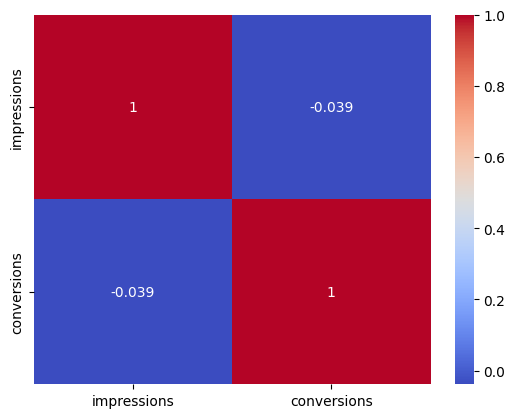

In [63]:
sns.heatmap(data[['impressions','conversions']].corr(),annot=True,cmap='coolwarm')

💡Podemos ver que não há correlação nenhuma entre impressões e conversões, portanto impressões não seria a melhor métrica de avaliação que pudesse explicar as conversões. O ideal é extrair uma base de dados com outras métricas que possuam correlação positiva com conversões, para aí sim pensar em estratégia de aumentar essa métrica.

In [100]:
data['date_x'].max()
data['date_y'].max()

Timestamp('2024-09-11 00:00:00')

Foi verificado que na tabela conversions possuem datas futuras (de dias que ainda não aconteceram). Entendemos que é uma tabela de exemplo, e que os períodos são fictícios apenas para concluir a análise.

In [73]:
date = pd.DataFrame({
    'date': pd.date_range(start='1/1/2024', end='12/31/2024')
})

In [86]:
data_new = pd.merge(date, conversions_no_outliers, on=['date'], how='left')

In [87]:
data_new = pd.merge(data_new, impressions_no_outliers, on=['date'], how='left')

In [88]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1404 non-null   datetime64[ns]
 1   ad_x           241 non-null    object        
 2   segment_x      241 non-null    object        
 3   conversions    241 non-null    float64       
 4   day_of_week_x  241 non-null    object        
 5   ad_y           975 non-null    object        
 6   segment_y      975 non-null    object        
 7   impressions    975 non-null    float64       
 8   day_of_week_y  975 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 98.8+ KB


In [89]:
data_new['conversions'] = data_new['conversions'].fillna(0)
data_new['impressions'] = data_new['impressions'].fillna(0)

In [90]:
data_new['conversion rate'] = data_new['conversions'] / data_new['impressions']

In [93]:
data_new['conversion rate'] = data_new['conversion rate'].fillna(0)

In [94]:
data_new.head()

,date,ad_x,segment_x,conversions,day_of_week_x,ad_y,segment_y,impressions,day_of_week_y,conversion rate
0,2024-01-01,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
1,2024-01-02,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
2,2024-01-03,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
3,2024-01-04,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
4,2024-01-05,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0


Text(0, 0.5, 'impressions')

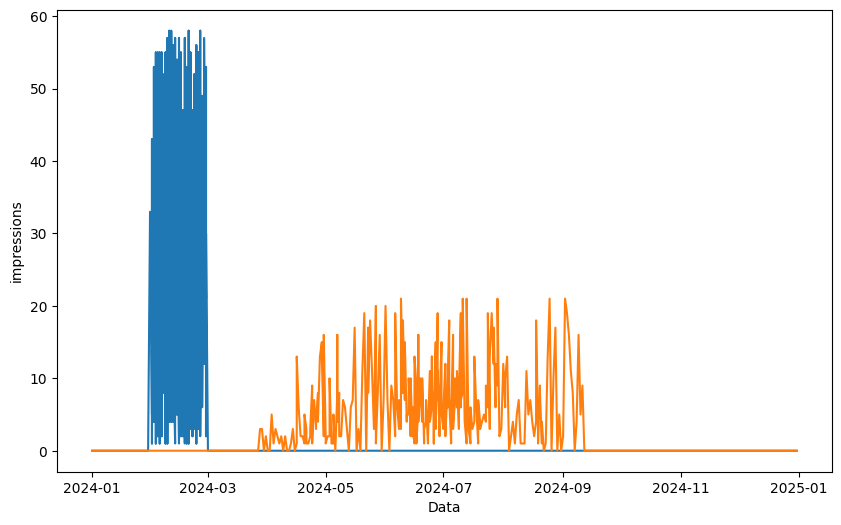

In [103]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(data_new['date'], data_new[['impressions','conversions']])
ax.set_xlabel('Data')
ax.set_ylabel('impressions')

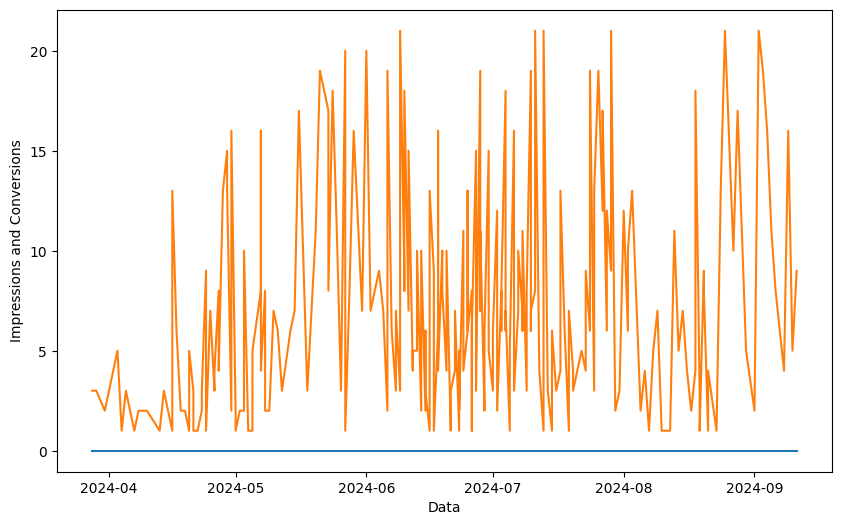

In [105]:
data_filtered = data_new[data_new['conversions'] > 0]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(data_filtered['date'], data_filtered[['impressions','conversions']])
ax.set_xlabel('Data')
ax.set_ylabel('Impressions and Conversions')
plt.show()

In [106]:
data_new.head()

,date,ad_x,segment_x,conversions,day_of_week_x,ad_y,segment_y,impressions,day_of_week_y,conversion rate
0,2024-01-01,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
1,2024-01-02,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
2,2024-01-03,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
3,2024-01-04,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0
4,2024-01-05,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0


In [107]:
data_new['weekday'] = data_new['date'].dt.day_name()

In [111]:
data_new.groupby('weekday')[['impressions','conversions']].sum()

,impressions,conversions
weekday,,
Friday,3430.0,209.0
Monday,4087.0,253.0
Saturday,4050.0,208.0
Sunday,4173.0,207.0
Thursday,2947.0,250.0
Tuesday,2954.0,309.0
Wednesday,3769.0,272.0


In [114]:
data_new.groupby(['ad_x','segment_x','weekday'])[['impressions','conversions']].sum()

impressions  conversions
ad_x segment_x weekday                            
ad1  seg1      Friday             0.0         17.0
               Monday             0.0         15.0
               Saturday           0.0          3.0
               Sunday             0.0         11.0
               Thursday           0.0         12.0
...                               ...          ...
ad3  seg4      Saturday           0.0         10.0
               Sunday             0.0          9.0
               Thursday           0.0          9.0
               Tuesday            0.0         33.0
               Wednesday          0.0         10.0

[84 rows x 2 columns]

In [115]:
data_filtered = data_new[(data_new['impressions'] > 0) | (data_new['conversions'] > 0)]

# Realizar a operação de agrupamento no DataFrame filtrado
grouped = data_filtered.groupby(['ad_x','segment_x','weekday'])[['impressions','conversions']].sum()

print(grouped)

                          impressions  conversions
ad_x segment_x weekday                            
ad1  seg1      Friday             0.0         17.0
               Monday             0.0         15.0
               Saturday           0.0          3.0
               Sunday             0.0         11.0
               Thursday           0.0         12.0
...                               ...          ...
ad3  seg4      Saturday           0.0         10.0
               Sunday             0.0          9.0
               Thursday           0.0          9.0
               Tuesday            0.0         33.0
               Wednesday          0.0         10.0

[84 rows x 2 columns]


A sequência seguirá no próximo arquivo, com o streamlit